# Hypothyroidism Clinic Camp Analysis at Nairobi Hospital

###Build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroidism.

##**Part 1**

- Build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid. Make use of at least 2 out of 3 advanced models : Random forests, Ada boosted trees, and gradient boosted trees.

- Try and optimize each of the 2 models, making sure to document how you've set up your hyperparameters.

- Identify which of the 2 models you trust most, and use your model to determine which features are most impactful in influencing the prediction.

##**Part 2**

- Document what transformation you've done on the data.

- Apply Polynomial, linear and rbf kernel function to build your SVM model and then evaluate their performance and pick the kernel that performs the best. Remember to tune your parameters to improve the performance of your model. To make your life easier, make sure to visualize the models you've created. Use any two features to build the models for this step.

- Hint: You may want to use decision trees to give you the most preferable features you can use. but also keep in mind that those features might not be suitable for SVM. It might be a good idea to graph them first.

- After getting your best performing kernel, use this kernel together with your tuned parameters and repeat the prediction but this time using additional features. Compare the model you've just created with the 2-features version. 

##Metrics of Success

- An accuracy score greater than 90%
- An F1 score also greater than 80%

##Data Exploration and Cleaning Process

In [0]:
#Load the necessary python libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#import the necessary scikit learn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix
from sklearn import metrics, preprocessing
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

In [0]:
#Load the dataset
hyp = pd.read_csv('hypothyroid.csv')

In [5]:
hyp.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?


In [6]:
#Check for missing values

hyp.isnull().sum()

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
TBG                          0
dtype: int64

In [7]:
#Descriptive analysis of the dataset

hyp.describe()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
count,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163
unique,2,93,3,2,2,2,2,2,2,2,2,2,2,2,2,240,2,70,2,269,2,159,2,281,2,53
top,negative,?,F,f,f,f,f,f,f,f,f,f,f,f,y,0,y,?,y,?,y,?,y,?,n,?
freq,3012,446,2182,2702,3108,3121,3059,2922,2920,3100,3064,3123,3161,3064,2695,894,2468,695,2914,249,2915,248,2916,247,2903,2903


In [8]:
#Check for the unique values in every column

for x in hyp.columns :
  print('\n')                    
  print(hyp[x].nunique())    
  print(hyp[x].unique())     



2
['hypothyroid' 'negative']


93
['72' '15' '24' '77' '85' '64' '20' '42' '69' '75' '53' '59' '68' '50'
 '78' '65' '28' '43' '40' '84' '?' '83' '63' '73' '36' '27' '48' '71' '60'
 '34' '79' '62' '74' '32' '41' '70' '29' '5' '58' '35' '51' '22' '16' '44'
 '39' '47' '18' '17' '88' '56' '30' '45' '66' '52' '54' '80' '33' '38'
 '92' '67' '46' '13' '89' '61' '49' '26' '57' '31' '90' '81' '25' '37'
 '76' '87' '23' '55' '86' '98' '21' '97' '1' '6' '14' '82' '11' '19' '9'
 '12' '10' '8' '7' '4' '93']


3
['M' 'F' '?']


2
['f' 't']


2
['f' 't']


2
['f' 't']


2
['f' 't']


2
['f' 't']


2
['f' 't']


2
['f' 't']


2
['f' 't']


2
['f' 't']


2
['f' 't']


2
['f' 't']


2
['y' 'n']


240
['30' '145' '0' '430' '7.30' '138' '7.70' '21' '92' '48' '36' '15' '15.30'
 '25' '61' '28' '170' '54' '216' '56' '71' '46' '70' '34' '53' '9.40'
 '126' '10' '530' '35' '65' '57' '125' '23' '80' '117' '49' '66' '8.20'
 '150' '?' '18' '165' '164' '24' '90' '77' '19' '58' '100' '213' '17'
 '235' '153' '13' '3

After exploration the data appears to not have missing values. 

Upon further exploration and checking for the unique values in the data it is evident that '?' is essentially a missing value.

We attempt to convert the '?' to a Nan value.

In [0]:
#Replace the ? with Nan values

hyp =hyp.replace(['?'], np.nan)

**What are the data types of the various columns?**

In [10]:
hyp.dtypes

status                       object
age                          object
sex                          object
on_thyroxine                 object
query_on_thyroxine           object
on_antithyroid_medication    object
thyroid_surgery              object
query_hypothyroid            object
query_hyperthyroid           object
pregnant                     object
sick                         object
tumor                        object
lithium                      object
goitre                       object
TSH_measured                 object
TSH                          object
T3_measured                  object
T3                           object
TT4_measured                 object
TT4                          object
T4U_measured                 object
T4U                          object
FTI_measured                 object
FTI                          object
TBG_measured                 object
TBG                          object
dtype: object

The data types for both the numerical and categorical values are listed as 'object'. We need to convert the numerical column data type to 'float64'. The categorical column data types are also to be converted to 'categorical' data type.

In [0]:
# Creating a list of the numerical columns in the dataset.
numeric = ['age', 'FTI', 'T3', 'T4U', 'TSH', 'TT4','TBG']

for x in hyp.columns:
   if x in numeric:
       hyp[x]=pd.to_numeric(hyp[x])
   else:
        hyp[x]=hyp[x].astype('category')

In [12]:
hyp.dtypes

status                       category
age                           float64
sex                          category
on_thyroxine                 category
query_on_thyroxine           category
on_antithyroid_medication    category
thyroid_surgery              category
query_hypothyroid            category
query_hyperthyroid           category
pregnant                     category
sick                         category
tumor                        category
lithium                      category
goitre                       category
TSH_measured                 category
TSH                           float64
T3_measured                  category
T3                            float64
TT4_measured                 category
TT4                           float64
T4U_measured                 category
T4U                           float64
FTI_measured                 category
FTI                           float64
TBG_measured                 category
TBG                           float64
dtype: objec

**Does the dataset have any duplicated records?**

In [13]:
#Check for and display the duplicated rows

print(hyp[hyp.duplicated()].head())

#Check for the number of duplicated rows

print(len(hyp[hyp.duplicated()]))

          status   age sex on_thyroxine  ... FTI_measured   FTI TBG_measured TBG
53   hypothyroid  69.0   F            f  ...            y  61.0            n NaN
66   hypothyroid  62.0   M            f  ...            y  10.0            n NaN
124  hypothyroid  77.0   F            f  ...            y  49.0            n NaN
128  hypothyroid  79.0   F            f  ...            y  48.0            n NaN
131  hypothyroid  50.0   F            t  ...            y  60.0            n NaN

[5 rows x 26 columns]
77


In [0]:
#Drop the duplicated records

hyp.drop_duplicates(inplace = True)

In [15]:
hyp.shape

#Successful drop of duplicates.

(3086, 26)

Thereafter we need to deal with the null values and find a way to replace them. 

Finding outliers will guide us on the best way to deal with the null values. (Fill with mean, mode, median or back-fill or forward-fill)



In [16]:
hyp.isnull().sum()

status                          0
age                           438
sex                            73
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
thyroid_surgery                 0
query_hypothyroid               0
query_hyperthyroid              0
pregnant                        0
sick                            0
tumor                           0
lithium                         0
goitre                          0
TSH_measured                    0
TSH                           455
T3_measured                     0
T3                            680
TT4_measured                    0
TT4                           240
T4U_measured                    0
T4U                           239
FTI_measured                    0
FTI                           238
TBG_measured                    0
TBG                          2835
dtype: int64

In [17]:
#Are there outliers in the age dataset?

Q1 = hyp.age.quantile(0.25)
Q3 = hyp.age.quantile(0.75)

IQR = Q3 - Q1

age_outliers = ((hyp.age < Q1 - 1.5 * IQR) | (hyp.age > Q3 + 1.5 * IQR))
age_outliers.value_counts()

False    3086
Name: age, dtype: int64

This means that there's no record of outliers, the best preferred method to deal with the missing values in the case of the age column is to fill using the mean.

In [18]:
#Find the mean of the age column

hyp.age.mean()

51.112537764350456

In [0]:
#Fill the missing value entries with the mean

hyp.age = hyp.age.fillna(hyp.age.mean())

Now, let's assess the remaining columns and attempt to make sense of them in order to understand what approach to take when dealing with the missing values.

In [20]:
#What column still has missing values?

hyp.isnull().sum()

status                          0
age                             0
sex                            73
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
thyroid_surgery                 0
query_hypothyroid               0
query_hyperthyroid              0
pregnant                        0
sick                            0
tumor                           0
lithium                         0
goitre                          0
TSH_measured                    0
TSH                           455
T3_measured                     0
T3                            680
TT4_measured                    0
TT4                           240
T4U_measured                    0
T4U                           239
FTI_measured                    0
FTI                           238
TBG_measured                    0
TBG                          2835
dtype: int64

The columns with missing values are:

- sex
- TSH
- T3
- TT4
- T4U
- FTI
- TBG

For sex, the general assumption is that the patient failed to record their gender. It would be highly inaccurate to assign a patient a wrong gender since that would tamper with the actual integrity of the data. Therefore, any missing value will be assigned the value 'unknown'.


In [21]:
#Fill a null value using fillna()  

hyp.sex = hyp.sex.replace(to_replace = np.nan, value = 'unknown')  

#Confirm the changes

hyp.sex.value_counts()
  

F          2119
M           894
unknown      73
Name: sex, dtype: int64

What do the other values mean?

What is TSH, T3, TT4, T4U, FTI, TBG ?

(Let's do a little background research on how they diagnose hypothyroidism.)

There are several types of hormones checked in a blood test to assess your thyroid status -

Thyroxine (T4): the major hormone produced by the thyroid gland. T4 gets converted to the active hormone T3 in various tissues in the body.

Triiodothyronine (T3): the active thyroid hormone, usually produced from thyroxine.

(TSH) thyroid stimulating hormone — produced by the pituitary gland that regulates thyroid function; also the best screening test to determine if the thyroid is functioning normally.

This let's us know that they are hormone tests taken when checking for hypothyroidism. 

When a test wasn't conducted on a patient a missing value was recorded as '?'. 

Would it be medically correct to fill the missing values with 0 ?

A low TSH and high T4 generally indicates hyperthyroidism. A high TSH and low T4 indicates primary hypothyroidism (due to a thyroid disease). A low TSH and low T4 suggest secondary hypothyroidism (due to a disease of the pituitary gland or hypothalamus of the brain).

So assigning a 0 to a missing value can essentially tamper with the results.

In [22]:
#Are there outliers in the TSH dataset?

Q1 = hyp.TSH.quantile(0.25)
Q3 = hyp.TSH.quantile(0.75)

IQR = Q3 - Q1

TSH_outliers = ((hyp.TSH < Q1 - 1.5 * IQR) | (hyp.TSH > Q3 + 1.5 * IQR))
TSH_outliers.value_counts()

False    2719
True      367
Name: TSH, dtype: int64

In [23]:
#Are there outliers in the T3 dataset?

Q1 = hyp.T3.quantile(0.25)
Q3 = hyp.T3.quantile(0.75)

IQR = Q3 - Q1

T3_outliers = ((hyp.T3 < Q1 - 1.5 * IQR) | (hyp.T3 > Q3 + 1.5 * IQR))
T3_outliers.value_counts()

False    2973
True      113
Name: T3, dtype: int64

In [24]:
#Are there outliers in the TT4 dataset?

Q1 = hyp.TT4.quantile(0.25)
Q3 = hyp.TT4.quantile(0.75)

IQR = Q3 - Q1

TT4_outliers = ((hyp.TT4 < Q1 - 1.5 * IQR) | (hyp.TT4 > Q3 + 1.5 * IQR))
TT4_outliers.value_counts()

False    2906
True      180
Name: TT4, dtype: int64

In [25]:
#Are there outliers in the T4U dataset?

Q1 = hyp.T4U.quantile(0.25)
Q3 = hyp.T4U.quantile(0.75)

IQR = Q3 - Q1

T4U_outliers = ((hyp.T4U < Q1 - 1.5 * IQR) | (hyp.T4U > Q3 + 1.5 * IQR))
T4U_outliers.value_counts()

False    2880
True      206
Name: T4U, dtype: int64

In [26]:
#Are there outliers in the FTI dataset?

Q1 = hyp.FTI.quantile(0.25)
Q3 = hyp.FTI.quantile(0.75)

IQR = Q3 - Q1

FTI_outliers = ((hyp.FTI < Q1 - 1.5 * IQR) | (hyp.FTI > Q3 + 1.5 * IQR))
FTI_outliers.value_counts()

False    2854
True      232
Name: FTI, dtype: int64

In [27]:
#Are there outliers in the TBG dataset?

Q1 = hyp.TBG.quantile(0.25)
Q3 = hyp.TBG.quantile(0.75)

IQR = Q3 - Q1

TBG_outliers = ((hyp.TBG < Q1 - 1.5 * IQR) | (hyp.TBG > Q3 + 1.5 * IQR))
TBG_outliers.value_counts()

False    3068
True       18
Name: TBG, dtype: int64

So how do we deal with the missing values? 

Personally I feel using the median is the best option since it is essentail to assign the patients a hormone level that's within normal range. 

So replace with the median value in each category.

In [0]:
#Fill the missing value entries with the median

hyp.TSH = hyp.TSH.fillna(hyp.TSH.median())

hyp.T3 = hyp.T3.fillna(hyp.T3.median())

hyp.TT4 = hyp.TT4.fillna(hyp.TT4.median())

hyp.FTI = hyp.FTI.fillna(hyp.FTI.median())

hyp.T4U = hyp.T4U.fillna(hyp.T4U.median())

hyp.TBG = hyp.TBG.fillna(hyp.TBG.median())


In [29]:
hyp.isnull().sum()

#Successfull!

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
TBG                          0
dtype: int64

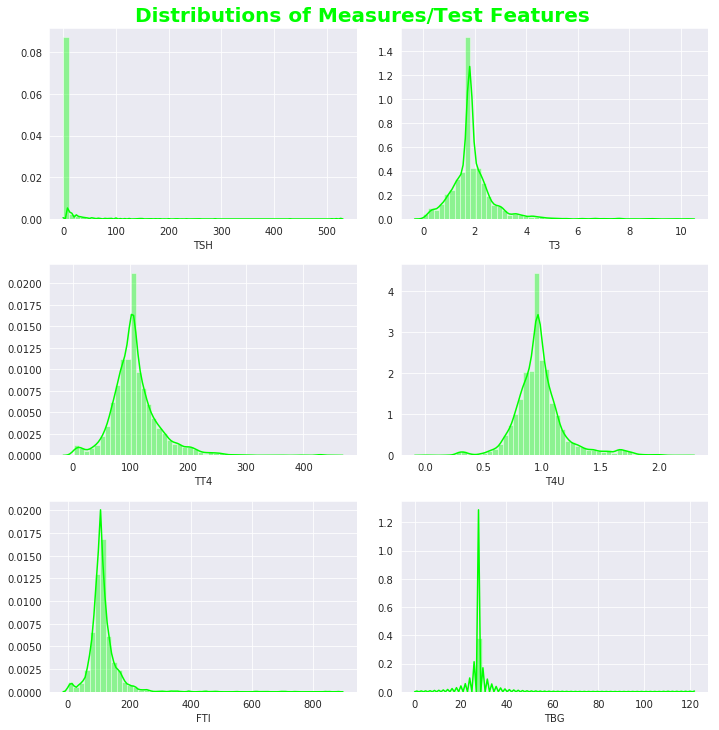

In [59]:
# Histograms of the numerical columns
# these are columns which represent measures or thyroid tests.
# First we create a list containing all the measures columns

measure_columns = ['TSH','T3','TT4','T4U','FTI','TBG']

sns.set_style('darkgrid')
fig, axes = plt.subplots(nrows=3, ncols = 2, figsize = (10,10))
fig.suptitle('Distributions of Measures/Test Features', y= 1.01, color = 'lime', fontsize = 20, weight = 'bold')

for ax, data, name in zip(axes.flatten(), hyp, measure_columns):
  sns.distplot(hyp[name], ax = ax, kde = True, color = 'lime')
plt.tight_layout()
plt.show()

##Pre-Processing

Thereafter, we map the categorical values to numbers to allow for the modelling process.

In [30]:
hyp.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72.0,M,f,f,f,f,f,f,f,f,f,f,f,y,30.0,y,0.6,y,15.0,y,1.48,y,10.0,n,28.0
1,hypothyroid,15.0,F,t,f,f,f,f,f,f,f,f,f,f,y,145.0,y,1.7,y,19.0,y,1.13,y,17.0,n,28.0
2,hypothyroid,24.0,M,f,f,f,f,f,f,f,f,f,f,f,y,0.0,y,0.2,y,4.0,y,1.00,y,0.0,n,28.0
3,hypothyroid,24.0,F,f,f,f,f,f,f,f,f,f,f,f,y,430.0,y,0.4,y,6.0,y,1.04,y,6.0,n,28.0
4,hypothyroid,77.0,M,f,f,f,f,f,f,f,f,f,f,f,y,7.3,y,1.2,y,57.0,y,1.28,y,44.0,n,28.0


In [0]:
categoricals = ['sex','on_thyroxine','query_on_thyroxine','on_antithyroid_medication','thyroid_surgery','query_hypothyroid','query_hyperthyroid','pregnant','sick','tumor','lithium','goitre','TSH_measured','T3_measured','TT4_measured','T4U_measured','FTI_measured','TBG_measured']

hyp = pd.get_dummies(hyp, columns=['sex','on_thyroxine','query_on_thyroxine','on_antithyroid_medication','thyroid_surgery','query_hypothyroid','query_hyperthyroid','pregnant','sick','tumor','lithium','goitre','TSH_measured','T3_measured','TT4_measured','T4U_measured','FTI_measured','TBG_measured'])

In [32]:
hyp.head(10)

,status,age,TSH,T3,TT4,T4U,FTI,TBG,sex_F,sex_M,sex_unknown,on_thyroxine_f,on_thyroxine_t,query_on_thyroxine_f,query_on_thyroxine_t,on_antithyroid_medication_f,on_antithyroid_medication_t,thyroid_surgery_f,thyroid_surgery_t,query_hypothyroid_f,query_hypothyroid_t,query_hyperthyroid_f,query_hyperthyroid_t,pregnant_f,pregnant_t,sick_f,sick_t,tumor_f,tumor_t,lithium_f,lithium_t,goitre_f,goitre_t,TSH_measured_n,TSH_measured_y,T3_measured_n,T3_measured_y,TT4_measured_n,TT4_measured_y,T4U_measured_n,T4U_measured_y,FTI_measured_n,FTI_measured_y,TBG_measured_n,TBG_measured_y
0,hypothyroid,72.0,30.0,0.6,15.0,1.48,10.0,28.0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,1,0
1,hypothyroid,15.0,145.0,1.7,19.0,1.13,17.0,28.0,1,0,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,1,0
2,hypothyroid,24.0,0.0,0.2,4.0,1.00,0.0,28.0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,1,0
3,hypothyroid,24.0,430.0,0.4,6.0,1.04,6.0,28.0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,1,0
4,hypothyroid,77.0,7.3,1.2,57.0,1.28,44.0,28.0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,1,0
5,hypothyroid,85.0,138.0,1.1,27.0,1.19,23.0,28.0,1,0,0,1,0,1,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,1,0
6,hypothyroid,64.0,7.7,1.3,54.0,0.86,63.0,28.0,1,0,0,1,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,1,0
7,hypothyroid,72.0,21.0,1.9,34.0,1.05,32.0,28.0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,1,0
8,hypothyroid,20.0,92.0,1.8,39.0,1.21,32.0,28.0,1,0,0,1,0,1,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,0,1,0,1,0,1,1,0
9,hypothyroid,42.0,48.0,1.8,7.6,1.02,7.5,28.0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,0,1,0,1,0,1,1,0


#Part 1 (RandomForest/AdaBoost)

Build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid. You should make use of at least 2 out of 3 advanced models : Random forests, Ada boosted trees, and gradient boosted trees.

Try and optimize each of the 2 models, making sure to document how you've set up your hyperparameters.

-Identify which of the 2 models you trust most, and use your model to determine which features are most impactful in influencing the prediction.

##Random Forest

In [33]:
#Load our dataset after pre-processing

hyp.head()

,status,age,TSH,T3,TT4,T4U,FTI,TBG,sex_F,sex_M,sex_unknown,on_thyroxine_f,on_thyroxine_t,query_on_thyroxine_f,query_on_thyroxine_t,on_antithyroid_medication_f,on_antithyroid_medication_t,thyroid_surgery_f,thyroid_surgery_t,query_hypothyroid_f,query_hypothyroid_t,query_hyperthyroid_f,query_hyperthyroid_t,pregnant_f,pregnant_t,sick_f,sick_t,tumor_f,tumor_t,lithium_f,lithium_t,goitre_f,goitre_t,TSH_measured_n,TSH_measured_y,T3_measured_n,T3_measured_y,TT4_measured_n,TT4_measured_y,T4U_measured_n,T4U_measured_y,FTI_measured_n,FTI_measured_y,TBG_measured_n,TBG_measured_y
0,hypothyroid,72.0,30.0,0.6,15.0,1.48,10.0,28.0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,1,0
1,hypothyroid,15.0,145.0,1.7,19.0,1.13,17.0,28.0,1,0,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,1,0
2,hypothyroid,24.0,0.0,0.2,4.0,1.00,0.0,28.0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,1,0
3,hypothyroid,24.0,430.0,0.4,6.0,1.04,6.0,28.0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,1,0
4,hypothyroid,77.0,7.3,1.2,57.0,1.28,44.0,28.0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,1,0


In [0]:
#Define the dependent variable and independent variable ; what's your target variable?

X = hyp.iloc[:,1:44]
y = hyp.iloc[:,0]

In [0]:
#Split the data into train and test sets ; train with 70% of the data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [0]:
#Feature Scaling

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [44]:
#Train your model

classifier = RandomForestClassifier(n_estimators = 100, random_state = 40, min_samples_split = 20, max_depth = 5)
classifier.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=40, verbose=0,
                       warm_start=False)

In [0]:
# Predicting the test set results

y_pred = classifier.predict(X_test)

In [46]:
#Confusion matrix 

cm = confusion_matrix(y_test, y_pred)
cm


array([[ 25,  13],
       [  4, 884]])

In [47]:
#Accuracy

accuracy = accuracy_score(y_test,y_pred)
accuracy

0.9816414686825053

In [48]:
print('The accuracy of the Random Forest Classifier is',accuracy*100,'%')

The accuracy of the Random Forest Classifier is 98.16414686825054 %


**Visualization of a random forest tree**

In [0]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

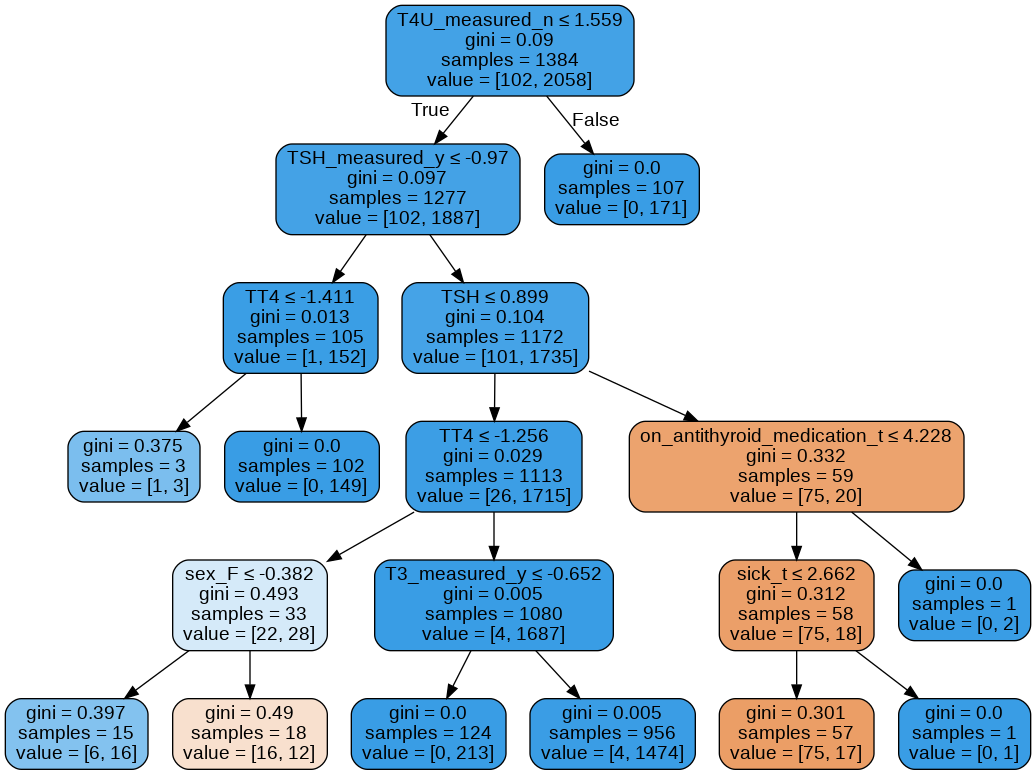

In [66]:
# Visualizing tree number 20

y_pred = classifier.predict(X_test)
dot_data = StringIO()

# picking a specific tree from the forest; tree  number 10
tree = classifier.estimators_[10]

export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Hypothyroid_Test.png')
Image(graph.create_png())

In [68]:
# Feature importance

# Get numerical feature importances
importances = list(tree.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(X.columns, importances)]

# Sorting the values in descending order, since we want to see the most important features first.
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: TSH                  Importance: 0.8
Variable: TT4                  Importance: 0.14
Variable: sex_F                Importance: 0.02
Variable: on_antithyroid_medication_t Importance: 0.02
Variable: sick_t               Importance: 0.01
Variable: T4U_measured_n       Importance: 0.01
Variable: age                  Importance: 0.0
Variable: T3                   Importance: 0.0
Variable: T4U                  Importance: 0.0
Variable: FTI                  Importance: 0.0
Variable: TBG                  Importance: 0.0
Variable: sex_M                Importance: 0.0
Variable: sex_unknown          Importance: 0.0
Variable: on_thyroxine_f       Importance: 0.0
Variable: on_thyroxine_t       Importance: 0.0
Variable: query_on_thyroxine_f Importance: 0.0
Variable: query_on_thyroxine_t Importance: 0.0
Variable: on_antithyroid_medication_f Importance: 0.0
Variable: thyroid_surgery_f    Importance: 0.0
Variable: thyroid_surgery_t    Importance: 0.0
Variable: query_hypothyroid_f  Importance

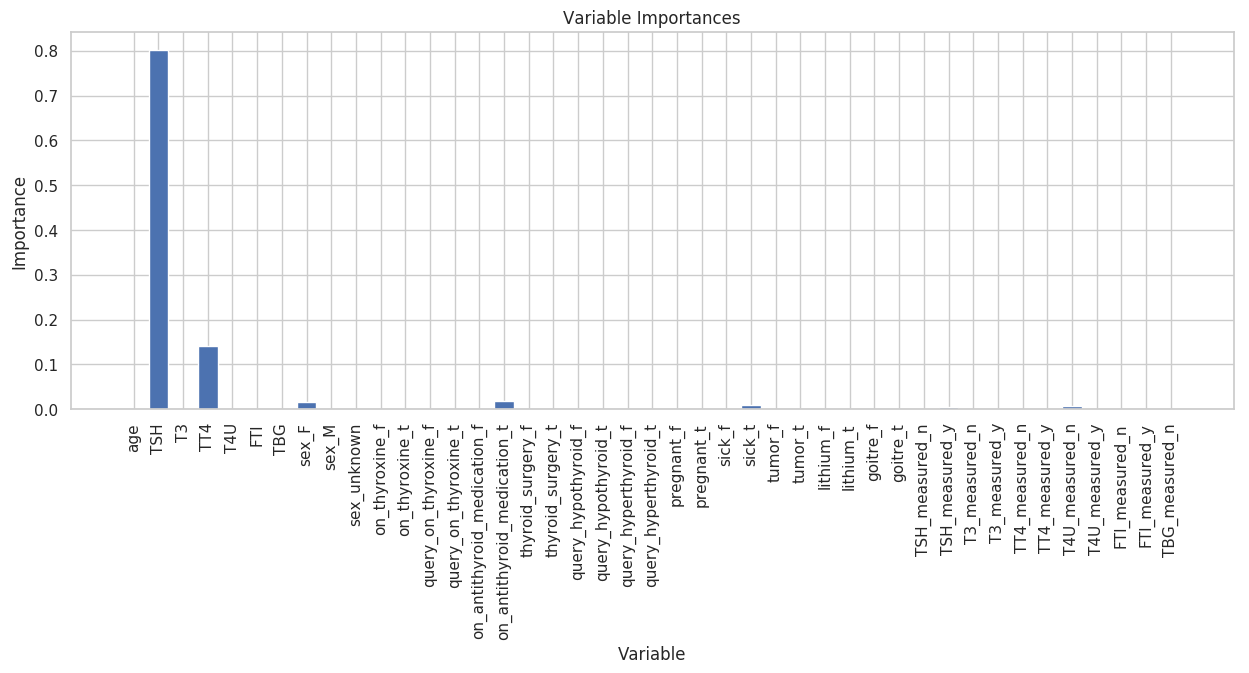

In [69]:
# list of Features and their importances for plotting
# Specifying the grid size and display for easier viewing

sns.set(style = 'whitegrid')

plt.figure(dpi = 100, figsize = (15,5))

x_values = list(range(len(importances)))

# Making a bar chart
plt.bar(x_values, importances, orientation = 'vertical')

# Labels and ticks for x axis
plt.xticks(x_values, X.columns, rotation= 'vertical')

# Labeling y axis and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');


**Optimization of Random Forest**

In [0]:
from pprint import pprint

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
              'max_features': max_features,
              'max_depth': max_depth,
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf,
              'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [100,
                  200,
                  300,
                  400,
                  500,
                  600,
                  700,
                  800,
                  900,
                  1000,
                  1100,
                  1200,
                  1300,
                  1400,
                  1500,
                  1600,
                  1700,
                  1800,
                  1900,
                  2000]}


In [0]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42,n_jobs = -1)

In [0]:
# Fit the random search model
rf_random.fit(X_train,y_train)

In [0]:
rf_random.best_params_

In [0]:
forestOpt = RandomForestClassifier(bootstrap=True,
                                  max_depth=70,
                                  min_samples_leaf=4,
                                  min_samples_split=10,
                                  n_estimators=400
                                  )

modelOpt = forestOpt.fit(X_train, y_train)

y_pred = modelOpt.predict(X_test)

#Find the accuracy

acc = accuracy_score(y_test,y_pred)
acc



0.9827213822894169

In [0]:
print('The accuracy of the Random Forest Classifier after hyperparameter tuning is',acc*100,'%')

The accuracy of the Random Forest Classifier after hyperparameter tuning is 98.27213822894169 %


The accuracy of the model seems to go down after hyperparamter tuning.

##AdaBoost Classifier

In [0]:
#Split the dataset and define the target variable and independent variables

X = hyp.iloc[:,1:44]
y = hyp.iloc[:,0]

In [0]:
#Split into test and train data

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [0]:
#Train the model using the AdaBoost Classifier

classifier = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),n_estimators=100)

classifier.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=1,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
                             

In [0]:
#Prediction

predictions = classifier.predict(X_test)

In [0]:
#Confusion matrix

confusion_matrix(y_test, predictions)

array([[ 30,   5],
       [  5, 732]])

In [0]:
#Accuracy

accuracy = accuracy_score(y_test,predictions)

accuracy

0.9870466321243523

In [0]:
print('The accuracy of the AdaBoost Classifier is',accuracy*100,'%')

The accuracy of the AdaBoost Classifier is 98.70466321243524 %


##Summary of part 1

The accuracy of the AdaBoost Classifier is 98.70466321243524 %

The accuracy of the Random Forest Classifier is 98.48812095032397 %

**The accuracy of the AdaBoost classifier is higher the Random Forest Classifier.**

#Part 2 (Support Vector Machines)

- Apply Polynomial, linear and rbf kernel function to build your SVM model and then evaluate their performance and pick the kernel that performs the best.

 Remember to tune your parameters to improve the performance of your model. To make your life easier, make sure to visualize the models you've created. Use any two features to build the models for this step.

- Hint: You may want to use decision trees to give you the most preferable features you can use. but also keep in mind that those features might not be suitable for SVM. It might be a good idea to graph them first.

- After getting your best performing kernel, use this kernel together with your tuned parameters and repeat the prediction but this time using additional features. Compare the model you've just created with the 2-features version.

SVMs requires careful preprocessing of the data and tuning of the parameters. This is why, these days, most people instead use tree-based models such as random forests or gradient boosting (which require little or no preprocessing) in many applications.

Parameters to tune:

- Kernel
- C
- Gamma

**rbf kernel**

In [0]:
svc_model = SVC(kernel= 'rbf',gamma='auto_deprecated',C=1.0)

In [0]:
svc_model.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [0]:
y_predict = svc_model.predict(X_test)

In [0]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

 hypothyroid       0.00      0.00      0.00        35
    negative       0.95      1.00      0.98       737

    accuracy                           0.95       772
   macro avg       0.48      0.50      0.49       772
weighted avg       0.91      0.95      0.93       772



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


The average precision is 0.91

**Linear Kernel**

In [0]:
svc_model = SVC(kernel= 'linear',gamma='auto_deprecated',C=1.0)

In [0]:
svc_model.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [0]:
y_predict = svc_model.predict(X_test)

In [0]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

 hypothyroid       0.96      0.66      0.78        35
    negative       0.98      1.00      0.99       737

    accuracy                           0.98       772
   macro avg       0.97      0.83      0.89       772
weighted avg       0.98      0.98      0.98       772



The average precision is 0.98

**Polynomial Kernel**

In [0]:
svc_model = SVC(kernel= 'poly',gamma='auto_deprecated',C=1.0)

In [0]:
svc_model.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='poly', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [0]:
y_predict = svc_model.predict(X_test)

In [0]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

 hypothyroid       0.77      0.77      0.77        35
    negative       0.99      0.99      0.99       737

    accuracy                           0.98       772
   macro avg       0.88      0.88      0.88       772
weighted avg       0.98      0.98      0.98       772



The linear kernel shows a higher level of precision than the other kernels with a macro avg and weighted avg higher than the other kernels.

**Feature Importance**

In [0]:
#What features are of higher importance in the SVM model

svm = LinearSVC()
svm = svm.fit(X_train, y_train)
pred = svm.predict(X_test)
cf = svm.coef_

cf

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


array([[-0.00170801, -0.01744877,  0.18457043, -0.00093503,  0.01455275,
         0.01862051, -0.01513243,  0.05031366,  0.00630367, -0.06599359,
        -0.09342299,  0.08404672, -0.01413601,  0.00475974, -0.17496224,
         0.16558597,  0.2112511 , -0.22062736, -0.02319048,  0.01381421,
         0.0424397 , -0.05181597, -0.01724312,  0.00786685, -0.18772682,
         0.17835055, -0.05142202,  0.04204575, -0.00937627,  0.        ,
         0.15941842, -0.16879469,  0.22732797, -0.23670423, -0.03631081,
         0.02693454,  0.0151731 , -0.02454937,  0.0151731 , -0.02454937,
         0.0151731 , -0.02454937,  0.00136791]])

In [0]:
X_train.columns

Index(['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG', 'sex_F', 'sex_M',
       'sex_unknown', 'on_thyroxine_f', 'on_thyroxine_t',
       'query_on_thyroxine_f', 'query_on_thyroxine_t',
       'on_antithyroid_medication_f', 'on_antithyroid_medication_t',
       'thyroid_surgery_f', 'thyroid_surgery_t', 'query_hypothyroid_f',
       'query_hypothyroid_t', 'query_hyperthyroid_f', 'query_hyperthyroid_t',
       'pregnant_f', 'pregnant_t', 'sick_f', 'sick_t', 'tumor_f', 'tumor_t',
       'lithium_f', 'lithium_t', 'goitre_f', 'goitre_t', 'TSH_measured_n',
       'TSH_measured_y', 'T3_measured_n', 'T3_measured_y', 'TT4_measured_n',
       'TT4_measured_y', 'T4U_measured_n', 'T4U_measured_y', 'FTI_measured_n',
       'FTI_measured_y', 'TBG_measured_n'],
      dtype='object')

**SVM after parameter tuning**

In [0]:
svc_model = SVC(kernel= 'linear',gamma='auto_deprecated',C=1.0)

In [0]:
svc_model.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [0]:
y_predict = svc_model.predict(X_test)

In [0]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

 hypothyroid       0.96      0.66      0.78        35
    negative       0.98      1.00      0.99       737

    accuracy                           0.98       772
   macro avg       0.97      0.83      0.89       772
weighted avg       0.98      0.98      0.98       772



The average precision remains the same at 0.98